In [25]:
import whisper
from pathlib import Path

In [ ]:
model = whisper.load_model(name="base", download_root="../models/whisper")

In [ ]:
dataset_path = Path.cwd().parent / "data/test/audio/" / \
    "cv-corpus-16.1-delta-2023-12-06-en/cv-corpus-16.1-delta-2023-12-06/en/clips"

In [44]:
audios_paths = list(dataset_path.glob("*"))
audio_path = audios_paths[0]

In [45]:
import IPython
IPython.display.Audio(filename=str(audio_path))

In [46]:
audio_path

PosixPath('/home/ezequiel/Documents/voice-assistent/data/test/audio/cv-corpus-16.1-delta-2023-12-06-en/cv-corpus-16.1-delta-2023-12-06/en/clips/common_voice_en_38686696.mp3')

In [47]:
result = model.transcribe(str(audio_path))
print(result["text"])

 the advertising pays for the running of the phone.


In [48]:
# load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio("../data/test/audio/test.mp3")
audio = whisper.pad_or_trim(audio)

RuntimeError: Failed to load audio: ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-lv2 --enable-omx --enable-openal --enable-opencl --enable-opengl --enable-sdl2 --enable-pocketsphinx --enable-librsvg --enable-libmfx --enable-libdc1394 --enable-libdrm --enable-libiec61883 --enable-chromaprint --enable-frei0r --enable-libx264 --enable-shared
  libavutil      56. 70.100 / 56. 70.100
  libavcodec     58.134.100 / 58.134.100
  libavformat    58. 76.100 / 58. 76.100
  libavdevice    58. 13.100 / 58. 13.100
  libavfilter     7.110.100 /  7.110.100
  libswscale      5.  9.100 /  5.  9.100
  libswresample   3.  9.100 /  3.  9.100
  libpostproc    55.  9.100 / 55.  9.100
../data/test/audio/test.mp3: No such file or directory


In [ ]:
# make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio).to(model.device)

In [ ]:
import matplotlib.pyplot as plt

/tmp/ipykernel_83586/3937666461.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=80).
  plt.specgram(mel.cpu().numpy())


(array([[6.44060836e-02],
        [2.15941747e-01],
        [4.19446179e-01],
        [6.14576163e-01],
        [7.03567925e-01],
        [6.66178233e-01],
        [5.44350918e-01],
        [3.99183239e-01],
        [2.76043782e-01],
        [1.90828640e-01],
        [1.37209715e-01],
        [1.02326165e-01],
        [7.55121637e-02],
        [4.99622515e-02],
        [2.51947158e-02],
        [7.24088342e-03],
        [1.27737743e-03],
        [5.37610522e-03],
        [1.43915132e-02],
        [2.58019133e-02],
        [3.73013790e-02],
        [4.33128332e-02],
        [4.03475627e-02],
        [3.30732797e-02],
        [2.88121422e-02],
        [2.76922855e-02],
        [2.39104517e-02],
        [1.53816200e-02],
        [6.49522821e-03],
        [1.69500502e-03],
        [9.77619331e-04],
        [1.79424256e-03],
        [2.03557732e-03],
        [1.16440437e-03],
        [5.33705300e-04],
        [2.11213899e-03],
        [5.70786636e-03],
        [8.65324984e-03],
        [9.2

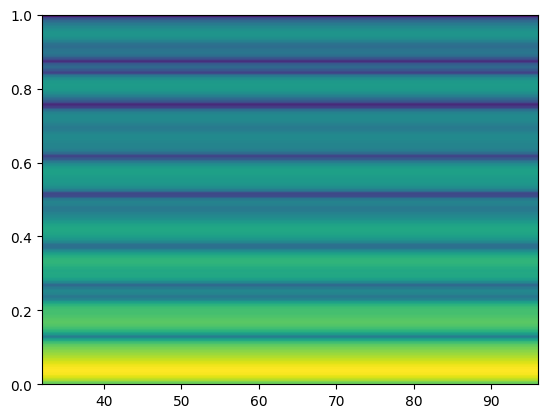

In [ ]:
plt.specgram(mel.cpu().numpy())

In [ ]:
# detect the spoken language
_, probs = model.detect_language(mel)
print(f"Detected language: {max(probs, key=probs.get)}")

Detected language: en


In [ ]:
# decode the audio
options = whisper.DecodingOptions()
result = whisper.decode(model, mel, options)

# print the recognized text
print(result.text)

and your boy.
